In [47]:
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np
from scipy.signal import find_peaks
from skimage.transform import rotate
import pims, sys
from pathlib import Path
from scipy.signal import savgol_filter
sys.path.insert(0, r'C:\\Warwick\\Jerko_Code_And_Docs\\Manuscript Code')
from Filament_Analysis.geometric_2 import SimpleSpline
from skimage.filters import threshold_yen
from skimage.filters import threshold_niblack
from skimage.morphology import opening, closing, disk, erosion, dilation
from skimage.measure import regionprops, label
import pickle

In [48]:
@pims.pipeline
def crop_image(frame):
    return frame[:,428:]

def show_image(path,n):
    
    img_stack = pims.open(path.as_posix())
    cropped = crop_image(img_stack)
    fig, ax = plt.subplots(1,1, figsize = (10,10))
    plt.imshow(cropped[n])

### 22-Feb-23_tirf-7


2 4683


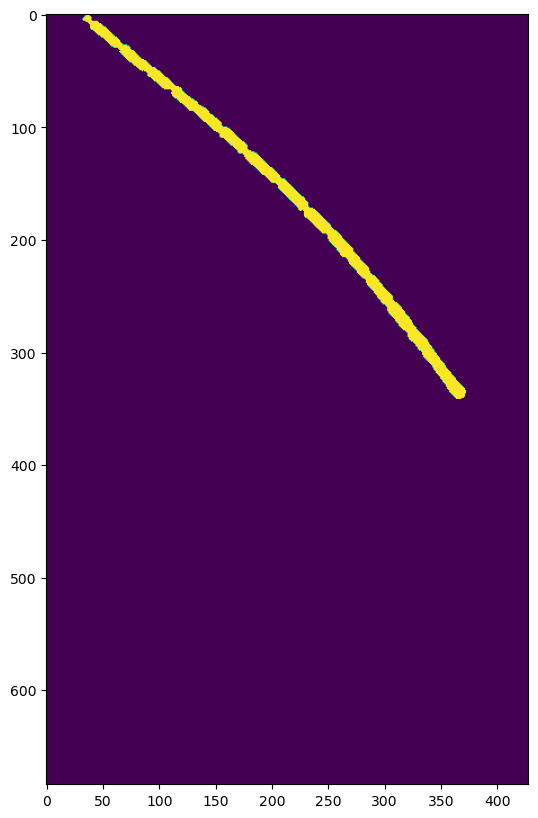

In [49]:
# Stack and file paths, here we have two stacks that will be combined later.
base_path = Path(r'C:\Users\jrosk\Dropbox\Warwick\TIRF\February_2023\22-02-2023\Untreated_Sample')

filepath = base_path.joinpath(r'Slides\Slide_1\22-Feb-23_tirf-7.tif')

images_ = pims.open(filepath.as_posix())
images = crop_image(images_)

# window_size=27, k=0.1 for top fil

binary = images[1060] > threshold_niblack(images[1060], window_size=29, k=0.17) 
binary = erosion(binary, disk(1))
binary = opening(binary, disk(1)) # 3 for top, 4 for mid

# plt.imshow(binary_2)

labelled = label(binary)

for region in regionprops(labelled):
    # take regions with large enough areas
        if region.area  <  4100: # < 5000 for top fil
            labelled[labelled== region.label] = 0
        elif region.area < 50:
            labelled[labelled== region.label] = 0
        else:
            print(region.label, region.area)

fig, ax = plt.subplots(1,1, figsize = (10,10))

plt.imshow(labelled)
#plt.ylim(600,300)
#plt.axhline(492)

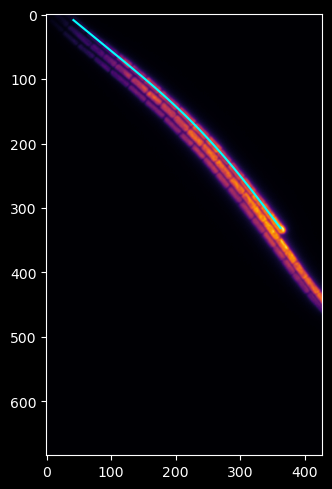

In [50]:
filament_axis = SimpleSpline.from_binary_image(dx=0.01,input_image=labelled>0, spline_k = 5)

#Sometimes the spline goes beyond the image dimensions and causes issues
filament_axis.crop_to_image_dimensions(images[0].shape)
filament_axis.coarse_distance_map(30)
# Visualise the spline
with plt.style.context('dark_background'):
    fig , ax = plt.subplots(1,1, figsize=(8,5))

    ax.imshow(images[1090], cmap='inferno')
    ax.plot(filament_axis.xy[500:-500,0], filament_axis.xy[500:-500:,1], color='cyan')
    #ax.set_ylim(500,200)
    plt.tight_layout()
    plt.show()

In [52]:
np.savetxt(r'spline_0.txt', filament_axis.xy, delimiter = ',', header = 'Spline 31/07/2023 Top Fil')

with open(r'spline_0.pkl', 'wb') as f:
    pickle.dump(filament_axis, f) 

Area:  176 | Label : 1
Area:  5706 | Label : 2
Area:  1020 | Label : 3
Area:  1049 | Label : 4
Area:  4189 | Label : 5
Area:  266 | Label : 6
Area:  4657 | Label : 7


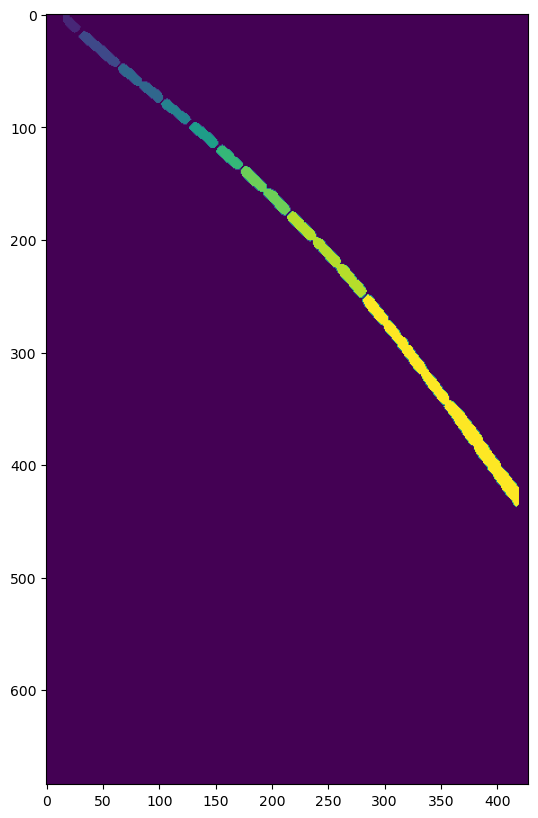

In [93]:
from skimage.filters import hessian

binary = images[1060] > threshold_niblack(images[1060], window_size=21, k=0.35) 
#binary = erosion(binary, disk(2))
binary = opening(binary, disk(3)) # 3 for top, 4 for mid

# plt.imshow(binary_2)

labelled = label(binary)

for region in regionprops(labelled):
    if region.area < 100:
        labelled[labelled == region.label] = 0
    else:
        print('Area: ', region.area, '| Label :', region.label)

labelled[labelled == 2] = 0 # top filament
labelled[labelled == 5] = 0 # big chunk of mid fil
labelled[labelled == 3] = 0 # small chunk of mid fil

labelled[:, 420:] = 0
labelled[:, :15] = 0

binary_2 = (labelled > 0).astype(int)
binary_2 = opening(binary_2, disk(2))
re_labelled = label(binary_2)
for region in regionprops(re_labelled):
    if region.centroid[0] > 400:
        re_labelled[re_labelled == region.label] = 0

fig, ax = plt.subplots(1,1, figsize = (10,10))

plt.imshow(re_labelled)
#plt.ylim(600,300)
#plt.axhline(492)

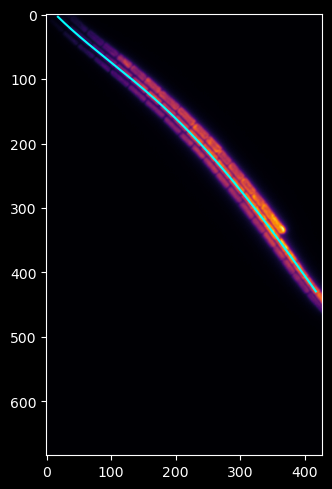

In [96]:
filament_axis = SimpleSpline.from_binary_image(dx=0.01,input_image=re_labelled>0, spline_k = 5)

#Sometimes the spline goes beyond the image dimensions and causes issues
filament_axis.crop_to_image_dimensions(images[0].shape)
filament_axis.coarse_distance_map(30)
# Visualise the spline
with plt.style.context('dark_background'):
    fig , ax = plt.subplots(1,1, figsize=(8,5))

    ax.imshow(images[1090], cmap='inferno')
    ax.plot(filament_axis.xy[:,0], filament_axis.xy[:,1], color='cyan')
    #ax.set_ylim(500,200)
    plt.tight_layout()
    plt.show()

In [97]:
np.savetxt(r'spline_1.txt', filament_axis.xy, delimiter = ',', header = 'Spline 31/07/2023 Middle Fil')

with open(r'spline_1.pkl', 'wb') as f:
    pickle.dump(filament_axis, f) 

Area:  1020 | Label : 3
Area:  4189 | Label : 5


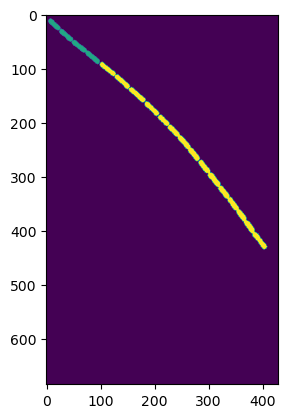

In [104]:
# Similar procedure for middle one

binary = images[1060] > threshold_niblack(images[1060], window_size=21, k=0.35) 
#binary = erosion(binary, disk(2))
binary = opening(binary, disk(3)) # 3 for top, 4 for mid

# plt.imshow(binary_2)

labelled = label(binary)

for region in regionprops(labelled):
    if region.area < 100:
        labelled[labelled == region.label] = 0
    elif region.label not in [3,5]:
        labelled[labelled == region.label] = 0
    else:
        print('Area: ', region.area, '| Label :', region.label)


plt.imshow(labelled)

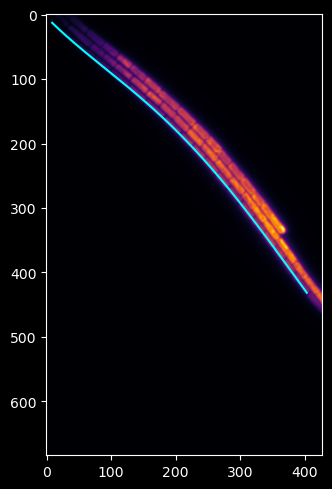

In [105]:
filament_axis = SimpleSpline.from_binary_image(dx=0.01,input_image=labelled>0, spline_k = 5)

#Sometimes the spline goes beyond the image dimensions and causes issues
filament_axis.crop_to_image_dimensions(images[0].shape)
filament_axis.coarse_distance_map(30)
# Visualise the spline
with plt.style.context('dark_background'):
    fig , ax = plt.subplots(1,1, figsize=(8,5))

    ax.imshow(images[1090], cmap='inferno')
    ax.plot(filament_axis.xy[:,0], filament_axis.xy[:,1], color='cyan')
    #ax.set_ylim(500,200)
    plt.tight_layout()
    plt.show()

In [106]:
np.savetxt(r'spline_2.txt', filament_axis.xy, delimiter = ',', header = 'Spline 31/07/2023 Bottom Fil')

with open(r'spline_2.pkl', 'wb') as f:
    pickle.dump(filament_axis, f) 